# BCS105E/MIS550E - Data Science Final Project

## New York City Taxi Rides - 2013

In this project your team is given two datasets with data from approximately 170,000 taxi rides in NYC in the year 2013. This is just a fraction of the original dataset, which contains over 173 Million rides.You can read more about this datset here: https://chriswhong.com/open-data/foil_nyc_taxi/

Your task in this project is to join, clean, transform, explore, analyze this dataset to create at least one baseline model to predict something about the tip of new rides based on some of the provided features. For example, you can try to predict if a ride will generate a tip or not, if the tip will be good or bad (define good or bad), if a tip will be above average, etc. You can pick and choose as many features (columns) you wish to include in the model. The goal is to achieve the best possible prediction power from the dataset.

In this notebook you must create at least one predictive model using any algorithm you want as long as you explain why you chose it and what are you expecting to get from it.

You also must make at least one attempt to improve the model by changing the algorithm, the features, the hyperparameters or any other aspect capable of improving the prediction power of the model.

Your team must turn this notebook in no later than November 29th, 2024 at 23:59. No late submission will be accepted. The late subission policy will not apply to this assignment and failure to meet this deadline will imply failing the course.

This notebook will be worth 250 points if all aspects of the Data Science pipeline are performed correctly. Among all the teams, the one with the higher overall model improvement will be awarded 50 extra points. This will be calculated by the % of improvement between the score of the baseline model and the best one after tuning/improvement.

On December 2nd, each team will have 15 minutes to present the project in class. The presentation will be worth 100 points. The presentation must cover the steps taken in this notebook, such as how the data was cleaned and transformed, the choices made, the hypothesis, the model initial results and the overall result of the model after tuning/improving it. The proesention should not be about code, but about analysis and results: what you had, what you did, why, and what you achieved.

The sections below will serve only as a guide for the main steps you need to follow. You can create and use as many cells for you Python code as you want in this section.

It's likely that you will need a couple of consultations with the professor.
Start working on this project as soon as possible and plan your work so you won't be at any risk of not be able to finish it in time.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
%matplotlib inline
from google.colab import files
import io
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix

# Section 1) Data Ingestion - 20 Points

Look for the files designated for your team in the class Google drive. You need to merge them in Python or SQL and get the full dataset loaded here as a Pandas data frame.

At the end of this section you must have a Pandas data frame with around 170,000 rows and 21 columns to ear the points of this section.

**To earn all the points in this section you must:**
 * Have both files (fare and trips) joined in one single file by the appropriated columns and loaded in this notebook


In [ ]:
#Write here how many rows and columns your dataset has at this stage.
# 1 - 173545 rows and 15 columns
# 2 - 173545 rows and 12 columns
# Joined dataset - 173865 rows and 21 columns

In [ ]:
#Start writing your code here:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import pandas as pd
df1 = pd.read_csv("/content/drive/MyDrive/trip_nyc_taxi_2013_dataset_4.csv")
df1.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,D1F475F4E336BF3B6242C5D94E915A69,7CB4DCE3A893B8439AC21BD94E6BEDF5,CMT,1,Y,2013-01-05T10:28:04.000Z,2013-01-05T11:06:16.000Z,1,2292,92.1,-73.982430,40.747627,-73.872740,40.774260
1,AE6723199069D150D19811415EAB6EC3,C3CB80B3EED0CF101B027ADEC9FEFF64,CMT,1,N,2013-02-13T03:24:53.000Z,2013-02-13T03:35:21.000Z,2,628,62.5,-74.010050,40.729740,-73.993740,40.766970
2,D9C7383A9DE84857B6CBE4D9F14A3861,9687310DB0703E669E9170E4A4A6B049,CMT,2,N,2013-02-23T10:24:07.000Z,2013-02-23T10:54:30.000Z,2,1823,58.6,-73.978455,40.750130,-73.803790,40.662888
3,4A0AB544BFDDFA79246AD552FFC54CE1,4E8DB60933B0D85B594D8C765935E68A,CMT,1,Y,2013-01-12T13:14:37.000Z,2013-01-12T13:54:33.000Z,1,2396,57.0,-73.957940,40.765358,-73.994354,40.726345
4,C98ABD996F7028EE2CDE0C2A95666559,1F84144447A9154760C1D6B486F0E915,CMT,1,N,2013-07-02T00:38:25.000Z,2013-07-02T02:09:30.000Z,4,5464,56.9,-73.776770,40.645270,-73.984180,40.691370


In [5]:
df2 = pd.read_csv("/content/drive/MyDrive/fare_nyc_taxi_2013_dataset_4.csv")
df2.head()

,medallion,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,00005007A9F30E289E760362F69E4EAD,15929F4E67FE2FFD1EA2A728DBAA1A23,CMT,2013-08-27T13:01:12.000Z,CRD,7.5,0.0,0.5,1.00,0.00,9.00
1,00005007A9F30E289E760362F69E4EAD,24C122A944FB8EE21D570C7067400D6F,CMT,2013-10-01T09:34:24.000Z,CRD,4.5,0.0,0.5,1.00,0.00,6.00
2,00005007A9F30E289E760362F69E4EAD,24C122A944FB8EE21D570C7067400D6F,CMT,2013-11-08T12:35:59.000Z,CSH,10.0,0.0,0.5,0.00,0.00,10.50
3,00005007A9F30E289E760362F69E4EAD,24C122A944FB8EE21D570C7067400D6F,CMT,2013-12-11T10:13:25.000Z,CRD,12.0,0.0,0.5,3.75,0.00,16.25
4,00005007A9F30E289E760362F69E4EAD,2C467A168227558F0CB572D00FF9EB60,CMT,2013-06-04T21:21:29.000Z,CRD,35.5,0.5,0.5,8.36,5.33,50.19


In [6]:
df = pd.merge(df1, df2, on=["medallion", "hack_license","vendor_id","pickup_datetime"])
df

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,...,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,D1F475F4E336BF3B6242C5D94E915A69,7CB4DCE3A893B8439AC21BD94E6BEDF5,CMT,1,Y,2013-01-05T10:28:04.000Z,2013-01-05T11:06:16.000Z,1,2292,92.10,...,40.747627,-73.872740,40.774260,CSH,2.5,0.0,0.5,0.00,0.00,3.00
1,AE6723199069D150D19811415EAB6EC3,C3CB80B3EED0CF101B027ADEC9FEFF64,CMT,1,N,2013-02-13T03:24:53.000Z,2013-02-13T03:35:21.000Z,2,628,62.50,...,40.729740,-73.993740,40.766970,CSH,11.5,0.5,0.5,0.00,0.00,12.50
2,D9C7383A9DE84857B6CBE4D9F14A3861,9687310DB0703E669E9170E4A4A6B049,CMT,2,N,2013-02-23T10:24:07.000Z,2013-02-23T10:54:30.000Z,2,1823,58.60,...,40.750130,-73.803790,40.662888,CSH,52.0,0.0,0.5,0.00,4.80,57.30
3,4A0AB544BFDDFA79246AD552FFC54CE1,4E8DB60933B0D85B594D8C765935E68A,CMT,1,Y,2013-01-12T13:14:37.000Z,2013-01-12T13:54:33.000Z,1,2396,57.00,...,40.765358,-73.994354,40.726345,CSH,2.5,0.0,0.5,0.00,0.00,3.00
4,C98ABD996F7028EE2CDE0C2A95666559,1F84144447A9154760C1D6B486F0E915,CMT,1,N,2013-07-02T00:38:25.000Z,2013-07-02T02:09:30.000Z,4,5464,56.90,...,40.645270,-73.984180,40.691370,CRD,151.5,0.5,0.5,30.00,0.00,182.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173860,E14C30F769D95779F55DB220486B2E0C,9ACD15FEF2FE969219E74A5B63A135E0,CMT,1,N,2013-12-14T01:24:39.000Z,2013-12-14T01:34:02.000Z,1,562,-6.20,...,40.758137,-74.012720,40.701570,CSH,18.0,0.5,0.5,0.00,0.00,19.00
173861,A8608B0C1235FCEB98A71197646FB3D9,C7DE86F6F2F1A0F7640CC1CD0DE0F853,VTS,1,NaN,2013-11-04T17:07:00.000Z,2013-11-04T17:28:00.000Z,1,1260,-7.47,...,40.703060,-73.952934,40.778290,CRD,24.0,1.0,0.5,6.25,0.00,31.75
173862,7E1F23B2F2E4935FD2FA222EAE4C9D74,76DC2668648AB0BF99E40AE45C839286,VTS,1,NaN,2013-01-04T23:49:00.000Z,2013-01-05T00:10:00.000Z,1,1260,-7.57,...,40.735176,-73.955800,40.818920,CRD,24.5,0.5,0.5,6.25,0.00,31.75
173863,8A8E948AED019CB9C6CA858BD6FD662C,AF3F4BC15519E7EA33C3D1FDC8C7AE9D,CMT,1,N,2013-10-31T11:55:35.000Z,2013-10-31T12:34:15.000Z,1,2319,-9.20,...,40.774406,-73.986290,40.761333,CSH,36.0,0.0,0.5,0.00,5.33,41.83


# Section 2) Data Cleaning and Transformation - 50 Points

In this section you need to inspect, clean and transform your data frame. Start by running some descriptive statistics, look for missing values (NANs), duplicates, capitalization issues, extra spaces on strings, etc. Fix the issues using the techniques demonstrated in class (slides, notebooks).

At the end of this section you must have a cleaned dataset ready to start analysis to earn the points of this section.

Make sure to explain the comments WHAT you are doing and WHY.

**To earn all the points in this section you must:**
 * Inspect each column of the dataset
 * Identify any inconsistencies in the data (There are at least 5).
 * Fix the inconsitencies
 * Explain why/how you are fixing fixing the inconsistencies
 * Create new features that you bealive will be helpful to make predictions


In [7]:
#Write here how many rows and columns your dataset has at this stage.
# before completing this stage - - 173865 rows and 21 columns
# after completing this stage -  173192 rows and 26 columns

In [ ]:
#Start writing your code here:

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173865 entries, 0 to 173864
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   medallion           173865 non-null  object 
 1   hack_license        173865 non-null  object 
 2   vendor_id           173765 non-null  object 
 3   rate_code           173865 non-null  int64  
 4   store_and_fwd_flag  87143 non-null   object 
 5   pickup_datetime     173865 non-null  object 
 6   dropoff_datetime    173865 non-null  object 
 7   passenger_count     173865 non-null  int64  
 8   trip_time_in_secs   173865 non-null  int64  
 9   trip_distance       173865 non-null  float64
 10  pickup_longitude    173865 non-null  float64
 11  pickup_latitude     173865 non-null  float64
 12  dropoff_longitude   173864 non-null  float64
 13  dropoff_latitude    173864 non-null  float64
 14  payment_type        173865 non-null  object 
 15  fare_amount         173865 non-nul

In [9]:
df.describe()

,rate_code,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
count,173865.000000,173865.000000,1.738650e+05,173865.000000,173865.000000,173865.000000,173864.000000,173864.000000,173865.000000,173865.000000,173865.000000,173865.000000,173865.000000,173665.000000
mean,1.034895,1.711851,8.057550e+02,2.908470,-72.484321,39.777443,-72.445926,39.755187,12.419832,0.319299,0.498088,1.376003,0.251132,14.865996
std,0.276822,2.039276,1.455718e+04,3.414243,11.056748,8.030826,11.176133,8.082098,10.260387,0.361151,0.031555,2.160608,1.200033,12.272953
min,0.000000,0.000000,-1.000000e+01,-9.860000,-76.970120,-74.015270,-79.946620,-74.181710,-65.000000,-1.000000,-0.500000,0.000000,0.000000,-65.000000
25%,1.000000,1.000000,3.600000e+02,1.040000,-73.992195,40.734463,-73.991460,40.733387,6.500000,0.000000,0.500000,0.000000,0.000000,8.000000
50%,1.000000,1.000000,6.000000e+02,1.800000,-73.981860,40.752357,-73.980286,40.752728,9.500000,0.000000,0.500000,1.000000,0.000000,11.050000
75%,1.000000,2.000000,9.600000e+02,3.200000,-73.966830,40.767110,-73.963540,40.767838,14.000000,0.500000,0.500000,2.000000,0.000000,16.500000
max,6.000000,500.000000,4.291088e+06,92.100000,40.824370,73.970570,40.855495,67.086900,280.000000,1.500000,2.500000,84.000000,24.750000,364.000000


In [10]:
df.head(10)

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,...,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,D1F475F4E336BF3B6242C5D94E915A69,7CB4DCE3A893B8439AC21BD94E6BEDF5,CMT,1,Y,2013-01-05T10:28:04.000Z,2013-01-05T11:06:16.000Z,1,2292,92.10,...,40.747627,-73.872740,40.774260,CSH,2.5,0.0,0.5,0.0,0.00,3.00
1,AE6723199069D150D19811415EAB6EC3,C3CB80B3EED0CF101B027ADEC9FEFF64,CMT,1,N,2013-02-13T03:24:53.000Z,2013-02-13T03:35:21.000Z,2,628,62.50,...,40.729740,-73.993740,40.766970,CSH,11.5,0.5,0.5,0.0,0.00,12.50
2,D9C7383A9DE84857B6CBE4D9F14A3861,9687310DB0703E669E9170E4A4A6B049,CMT,2,N,2013-02-23T10:24:07.000Z,2013-02-23T10:54:30.000Z,2,1823,58.60,...,40.750130,-73.803790,40.662888,CSH,52.0,0.0,0.5,0.0,4.80,57.30
3,4A0AB544BFDDFA79246AD552FFC54CE1,4E8DB60933B0D85B594D8C765935E68A,CMT,1,Y,2013-01-12T13:14:37.000Z,2013-01-12T13:54:33.000Z,1,2396,57.00,...,40.765358,-73.994354,40.726345,CSH,2.5,0.0,0.5,0.0,0.00,3.00
4,C98ABD996F7028EE2CDE0C2A95666559,1F84144447A9154760C1D6B486F0E915,CMT,1,N,2013-07-02T00:38:25.000Z,2013-07-02T02:09:30.000Z,4,5464,56.90,...,40.645270,-73.984180,40.691370,CRD,151.5,0.5,0.5,30.0,0.00,182.50
5,B505BF57EE08B47D1A9A28F746C46A37,D761DD052975089232D699962F4BEFA7,VTS,5,NaN,2013-12-20T02:51:00.000Z,2013-12-20T03:51:00.000Z,1,3600,53.63,...,40.743034,-73.433690,41.231308,CRD,150.0,0.0,0.0,30.0,0.00,180.00
6,BFB98061C0C71C533F3376D7FFD3A60B,D56604D60C3CC3082911C39ABB6A11D8,CMT,1,Y,2013-12-27T11:35:30.000Z,2013-12-27T15:22:24.000Z,1,650,43.90,...,40.724777,-73.984070,40.757732,CSH,176.5,0.0,0.5,0.0,0.00,177.00
7,859015006B86E24555926C8FF4BAF9DC,302833C8499E87D086DC9D35141452E6,CMT,1,N,2013-09-07T08:17:45.000Z,2013-09-07T09:11:31.000Z,2,3225,43.40,...,40.756220,-73.270706,40.770443,CSH,113.5,0.0,0.5,0.0,5.33,119.33
8,AE9C91C2C937D43D0B45301A0C2A7B1D,1DD2326F0BAF89EAFB35A8452CD2121E,VTS,3,NaN,2013-05-23T16:52:00.000Z,2013-05-23T19:13:00.000Z,1,8460,43.39,...,-73.781400,40.690410,-74.177704,crd,150.0,1.0,0.0,30.2,15.58,196.78
9,0A0D29B8052DFAC824AA63B718BF0A20,E9463A84819A385B56E8241EAB5DB24E,CMT,1,N,2013-03-05T15:31:31.000Z,2013-03-05T15:33:20.000Z,1,109,39.50,...,40.752983,-73.991210,40.750473,CSH,3.0,0.0,0.5,0.0,0.00,3.50


In [ ]:
"""Missing Values:
vendor_id and store_and_fwd_flag: Filled missing values with "Unknown".
Dropped rows with missing critical numerical data like dropoff_longitude, dropoff_latitude, and total_amount."""

In [11]:
# Filling missing categorical data with 'Unknown'
df['vendor_id'].fillna('Unknown', inplace=True)
df['store_and_fwd_flag'].fillna('Unknown', inplace=True)

In [12]:
# Dropping rows with missing critical numerical data
df.dropna(subset=['dropoff_longitude', 'dropoff_latitude', 'total_amount'], inplace=True)

In [13]:
# Fixed Inconsistencies:
#Negative values in numerical columns were replaced with NaN.
#Text columns (vendor_id, payment_type) were standardized by removing extra spaces and converting to uppercase.
#Duplicate rows based on medallion and pickup_datetime were removed. """

In [14]:
# Step 2: Fix Negative/Invalid Values
# Ensuring all numeric columns have reasonable values
# Replace negative values with NaN and review their validity
numeric_columns = ['trip_time_in_secs', 'trip_distance', 'fare_amount', 'surcharge', 'mta_tax', 'total_amount']
df[numeric_columns] = df[numeric_columns].applymap(lambda x: x if x >= 0 else None)

In [15]:
# Step 3: Fix Text Issues (Capitalization, Extra Spaces)
df['vendor_id'] = df['vendor_id'].str.strip().str.upper()
df['payment_type'] = df['payment_type'].str.strip().str.upper()

In [16]:
# Step 4: Remove Duplicates
# Check for duplicates using 'medallion' and 'pickup_datetime'
df.drop_duplicates(subset=['medallion', 'pickup_datetime'], inplace=True)

In [17]:
#step 5: Removing negative passenger count and also limiting the passengers count to 5
# Remove negative values and limit the count to a maximum of 5
df['passenger_count'] = df['passenger_count'].apply(lambda x: max(min(int(x), 5), 1) if x >= 0 else None)

In [18]:
#Feature Engineering:
# adding Tip Yes Or No(0 or 1)
#Added pickup_day (day of the week) and pickup_hour (hour of the day) based on pickup_datetime.
#Calculated trip_duration_minutes using the difference between dropoff_datetime and pickup_datetime.
#Derive weekend feature from pickup time
#Categorized trips into bins (Very Short, Short, Medium, Long, Very Long) based on distance."""

In [19]:
# Step 5: Feature Engineering

#Tip Yes Or No(0 or 1)
df['tip_given'] = df['tip_amount'].apply(lambda x: 'Yes' if x > 0 else 'No')
df.drop(columns=['tip_amount'], inplace=True)

# Extracting date/time features
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])
df['pickup_day'] = df['pickup_datetime'].dt.day_name()
df['pickup_hour'] = df['pickup_datetime'].dt.hour

# Creating trip duration in minutes
df['trip_duration_minutes'] = (df['dropoff_datetime'] - df['pickup_datetime']).dt.total_seconds() / 60

# Derive weekend feature from pickup time
df["is_weekend"] = (df['pickup_datetime'].dt.dayofweek > 4).astype(int)

# Categorizing trips based on distance
bins = [0, 2, 5, 10, 20, float('inf')]
labels = ['Very Short', 'Short', 'Medium', 'Long', 'Very Long']
df['trip_distance_category'] = pd.cut(df['trip_distance'], bins=bins, labels=labels)

# Inspect cleaned data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 173192 entries, 0 to 173864
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   medallion               173192 non-null  object             
 1   hack_license            173192 non-null  object             
 2   vendor_id               173192 non-null  object             
 3   rate_code               173192 non-null  int64              
 4   store_and_fwd_flag      173192 non-null  object             
 5   pickup_datetime         173192 non-null  datetime64[ns, UTC]
 6   dropoff_datetime        173192 non-null  datetime64[ns, UTC]
 7   passenger_count         173192 non-null  int64              
 8   trip_time_in_secs       173191 non-null  float64            
 9   trip_distance           173177 non-null  float64            
 10  pickup_longitude        173192 non-null  float64            
 11  pickup_latitude         173192 

In [ ]:
#Fix Negative Trip Durations

In [20]:
# Fix negative trip durations by swapping pickup and dropoff times
def fix_negative_durations(row):
    if row['trip_duration_minutes'] < 0:
        return (row['pickup_datetime'] - row['dropoff_datetime']).total_seconds() / 60
    return row['trip_duration_minutes']

df['trip_duration_minutes'] = df.apply(fix_negative_durations, axis=1)

In [ ]:
#Handle Missing Distance Categories

In [21]:
# Fill missing trip_distance with the median
median_distance = df['trip_distance'].median()
df['trip_distance'].fillna(median_distance, inplace=True)

# Estimate remaining trip_distance using trip_duration_minutes if available
average_speed_miles_per_minute = 0.33  # Approx. average urban taxi speed
df['trip_distance'] = df['trip_distance'].fillna(
    df['trip_duration_minutes'] * average_speed_miles_per_minute
)

# Recreate trip_distance_category
bins = [0, 2, 5, 10, 20, float('inf')]
labels = ['Very Short', 'Short', 'Medium', 'Long', 'Very Long']
df['trip_distance_category'] = pd.cut(df['trip_distance'], bins=bins, labels=labels)

# Handle remaining missing categories as 'Unknown'
df['trip_distance_category'] = df['trip_distance_category'].cat.add_categories('Unknown')
df['trip_distance_category'].fillna('Unknown', inplace=True)


In [48]:
#Validate the Fixes

In [22]:
# Check for any remaining issues
negative_durations_fixed = df[df['trip_duration_minutes'] < 0]
missing_distance_categories = df['trip_distance_category'].isnull().sum()

print(f"Negative durations remaining: {negative_durations_fixed.shape[0]}")
print(f"Missing distance categories: {missing_distance_categories}")

Negative durations remaining: 0
Missing distance categories: 0


In [23]:
df

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,...,surcharge,mta_tax,tolls_amount,total_amount,tip_given,pickup_day,pickup_hour,trip_duration_minutes,is_weekend,trip_distance_category
0,D1F475F4E336BF3B6242C5D94E915A69,7CB4DCE3A893B8439AC21BD94E6BEDF5,CMT,1,Y,2013-01-05 10:28:04+00:00,2013-01-05 11:06:16+00:00,1,2292.0,92.1,...,0.0,0.5,0.00,3.00,No,Saturday,10,38.200000,1,Very Long
1,AE6723199069D150D19811415EAB6EC3,C3CB80B3EED0CF101B027ADEC9FEFF64,CMT,1,N,2013-02-13 03:24:53+00:00,2013-02-13 03:35:21+00:00,2,628.0,62.5,...,0.5,0.5,0.00,12.50,No,Wednesday,3,10.466667,0,Very Long
2,D9C7383A9DE84857B6CBE4D9F14A3861,9687310DB0703E669E9170E4A4A6B049,CMT,2,N,2013-02-23 10:24:07+00:00,2013-02-23 10:54:30+00:00,2,1823.0,58.6,...,0.0,0.5,4.80,57.30,No,Saturday,10,30.383333,1,Very Long
3,4A0AB544BFDDFA79246AD552FFC54CE1,4E8DB60933B0D85B594D8C765935E68A,CMT,1,Y,2013-01-12 13:14:37+00:00,2013-01-12 13:54:33+00:00,1,2396.0,57.0,...,0.0,0.5,0.00,3.00,No,Saturday,13,39.933333,1,Very Long
4,C98ABD996F7028EE2CDE0C2A95666559,1F84144447A9154760C1D6B486F0E915,CMT,1,N,2013-07-02 00:38:25+00:00,2013-07-02 02:09:30+00:00,4,5464.0,56.9,...,0.5,0.5,0.00,182.50,Yes,Tuesday,0,91.083333,0,Very Long
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173860,E14C30F769D95779F55DB220486B2E0C,9ACD15FEF2FE969219E74A5B63A135E0,CMT,1,N,2013-12-14 01:24:39+00:00,2013-12-14 01:34:02+00:00,1,562.0,1.8,...,0.5,0.5,0.00,19.00,No,Saturday,1,9.383333,1,Very Short
173861,A8608B0C1235FCEB98A71197646FB3D9,C7DE86F6F2F1A0F7640CC1CD0DE0F853,VTS,1,Unknown,2013-11-04 17:07:00+00:00,2013-11-04 17:28:00+00:00,1,1260.0,1.8,...,1.0,0.5,0.00,31.75,Yes,Monday,17,21.000000,0,Very Short
173862,7E1F23B2F2E4935FD2FA222EAE4C9D74,76DC2668648AB0BF99E40AE45C839286,VTS,1,Unknown,2013-01-04 23:49:00+00:00,2013-01-05 00:10:00+00:00,1,1260.0,1.8,...,0.5,0.5,0.00,31.75,Yes,Friday,23,21.000000,0,Very Short
173863,8A8E948AED019CB9C6CA858BD6FD662C,AF3F4BC15519E7EA33C3D1FDC8C7AE9D,CMT,1,N,2013-10-31 11:55:35+00:00,2013-10-31 12:34:15+00:00,1,2319.0,1.8,...,0.0,0.5,5.33,41.83,No,Thursday,11,38.666667,0,Very Short


# Section 3) Data Analysis - 70 Points

In this section, explore your transformed data frame. Create plots (histograms, categorical variable counts, etc,), check correlations between features (columns) and the target variable, check for multi-colinearity.

At the end of this section you must have your data frame ready for modeling according to the hypothesis you want to test to earn the points of this sections. You must explain your hypothesis in terms of which features (columns) you chose, which ones you discarded, what is your target variable and what you are trying to predict.

Make sure to explain the comments WHAT you are doing and WHY.

**To earn all the points in this section you must:**
 * Analyze how each feature in the dataset may or may not be correlated to what you are trying to predict
 * Decide with features you are keeping in the model and which you are dropping
 * CLEARLY EXPLAIN your theory, which means, why do you think the features your are keeping the the model will be helpful and why the one you are dropping will not.



In [ ]:
#Write here how many rows and columns your dataset has at this stage.
#173192 rows and 26 columns

In [ ]:
#Start writing your code here:

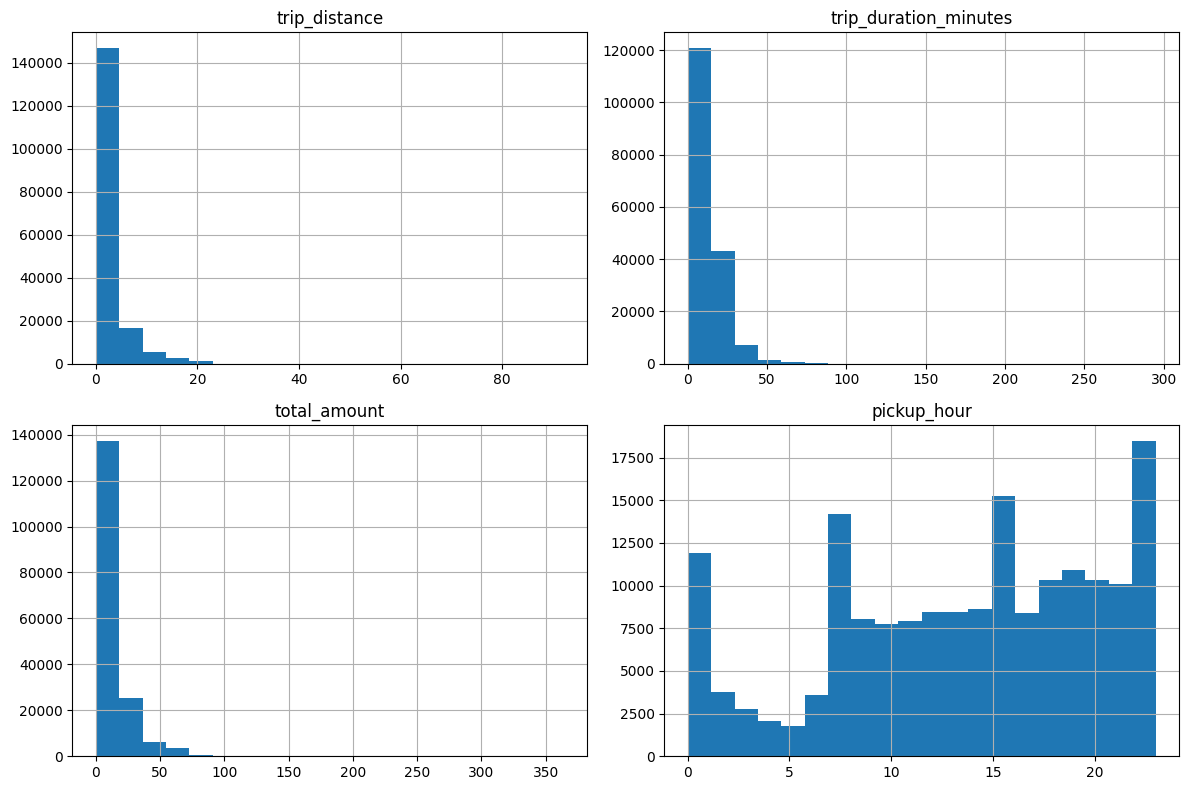

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Visualize Distributions
# Histograms for numerical features
numerical_features = ['trip_distance', 'trip_duration_minutes', 'total_amount', 'pickup_hour']
df[numerical_features].hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()

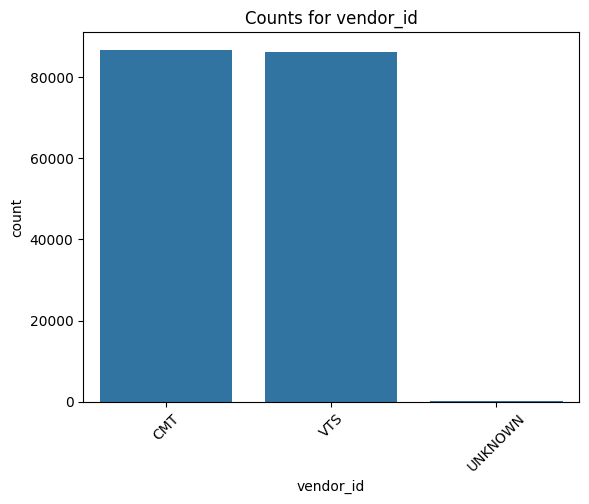

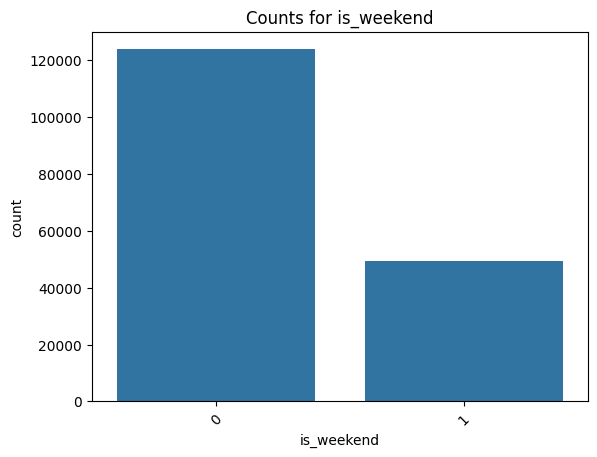

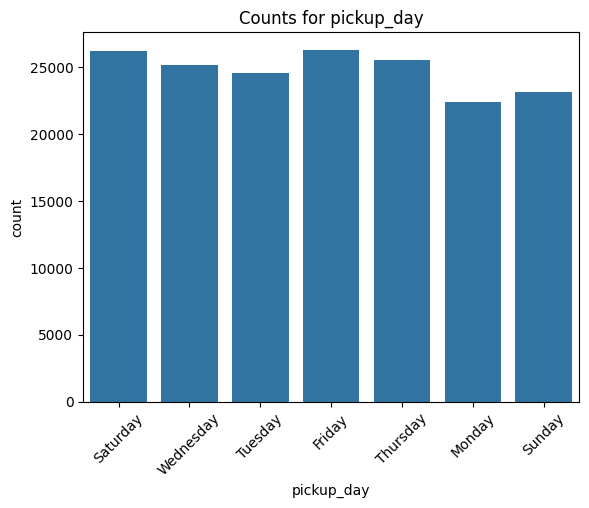

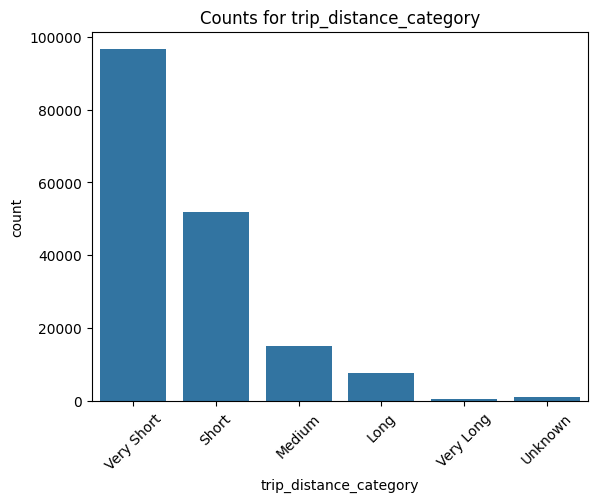

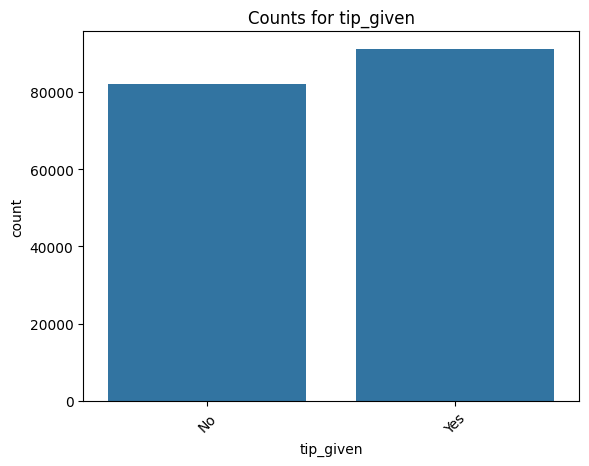

In [25]:
# Bar plot for categorical features
categorical_features = ['vendor_id', 'is_weekend', 'pickup_day', 'trip_distance_category', 'tip_given']
for col in categorical_features:
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.title(f"Counts for {col}")
    plt.show()

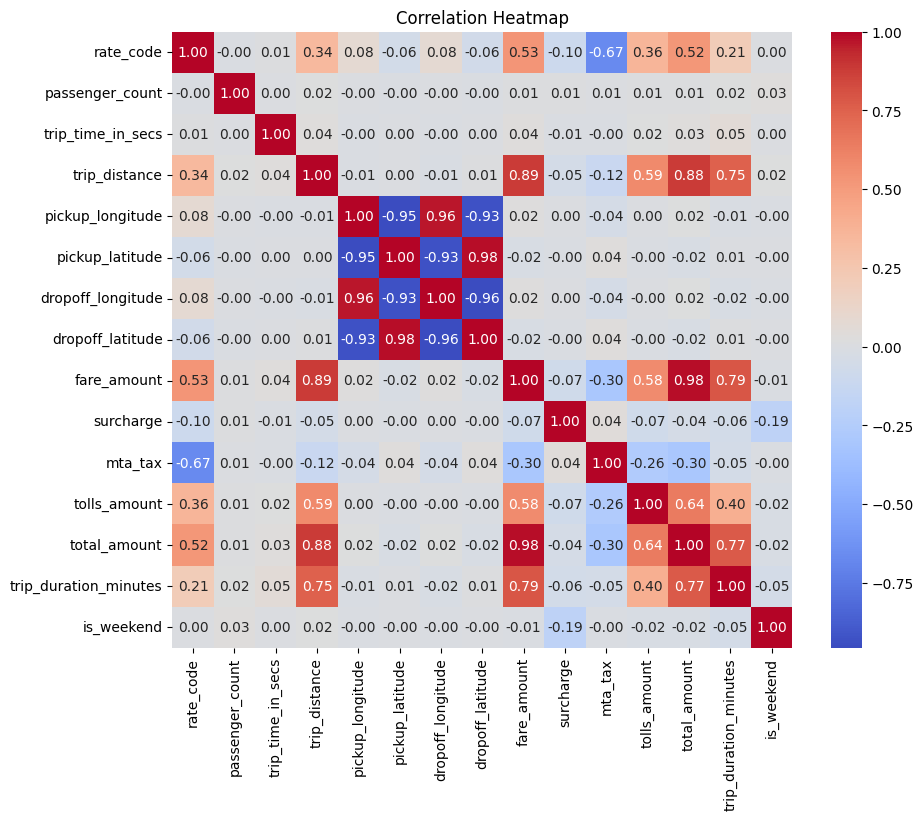

In [26]:
# 2. Correlation Heatmap
# Check correlations between numerical features and the target variable
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix for numeric columns
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

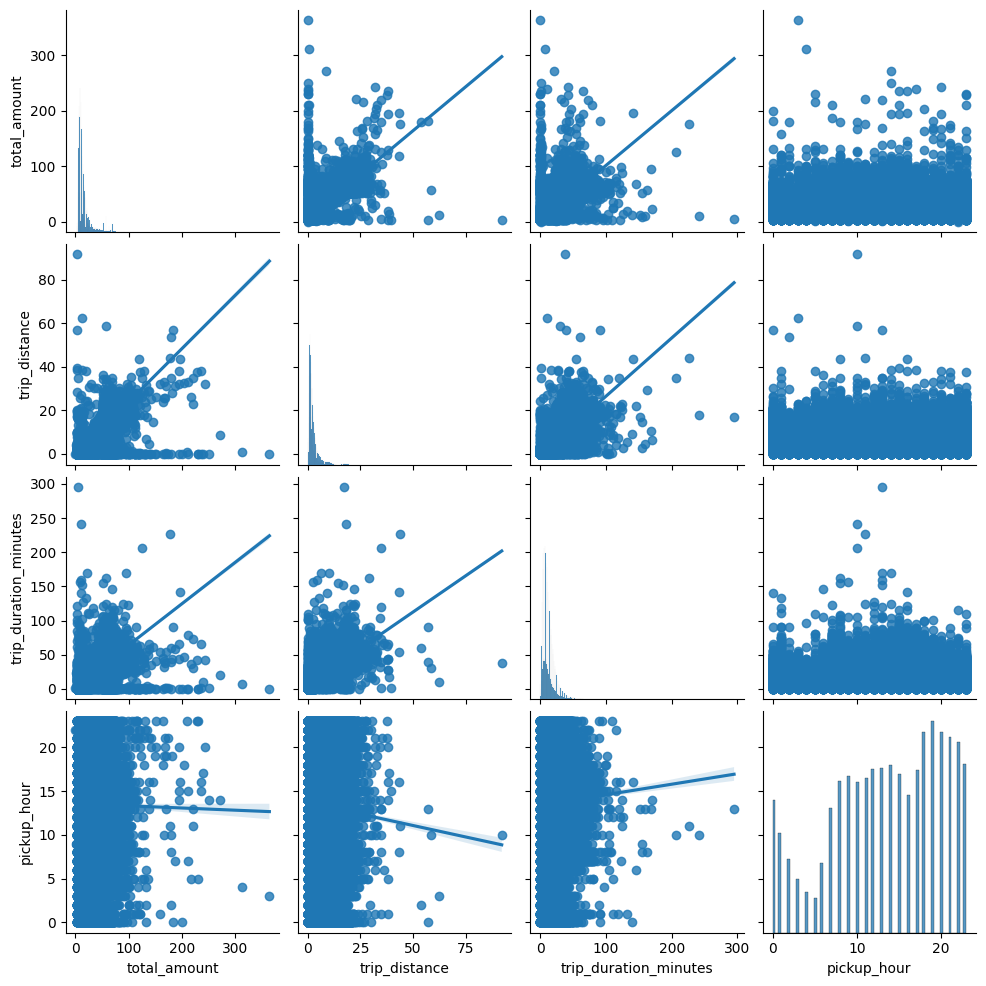

In [27]:
# 3. Pairplots for Detailed Relationships
# Example: relationships between `total_amount` and key numerical features
sns.pairplot(df, vars=['total_amount', 'trip_distance', 'trip_duration_minutes', 'pickup_hour'], kind='reg')
plt.show()

In [28]:
# 4. Check Multicollinearity
# High correlation (> 0.8) between independent features indicates multicollinearity
correlated_features = corr_matrix[(corr_matrix > 0.8) & (corr_matrix < 1.0)].stack()
print("Highly Correlated Features:")
print(correlated_features)

Highly Correlated Features:
trip_distance      fare_amount          0.885300
                   total_amount         0.882467
pickup_longitude   dropoff_longitude    0.962412
pickup_latitude    dropoff_latitude     0.979191
dropoff_longitude  pickup_longitude     0.962412
dropoff_latitude   pickup_latitude      0.979191
fare_amount        trip_distance        0.885300
                   total_amount         0.983940
total_amount       trip_distance        0.882467
                   fare_amount          0.983940
dtype: float64


In [29]:
# 5. Feature Selection
# Drop features with multicollinearity or weak relationships to the target
df.drop(columns=['pickup_datetime', 'dropoff_datetime', 'medallion','vendor_id','rate_code','passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','surcharge','mta_tax','tolls_amount','fare_amount','hack_license','store_and_fwd_flag','trip_time_in_secs'], inplace=True)

**Target Variable:**

tip_given: Predicting whether a tip is given (binary outcome: 'Yes' or 'No')
based on trip features.


**Important Features:**

trip_distance: Strongly correlates with trip length and fare, influencing tipping likelihood.

trip_duration_minutes: Longer trips are often associated with higher chances of tipping.

pickup_hour: Time of day impacts tipping behavior (e.g., higher tips during specific hours).

is_weekend: Tipping trends may vary between weekdays and weekends.

total_amount: Serves as a comprehensive feature capturing the overall cost, which impacts tipping.

**Dropped Features:**

Irrelevant:
medallion, vendor_id, rate_code – Do not directly affect tipping behavior.

Multicollinearity:
pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude – Highly correlated and redundant for prediction.

Redundancy:
fare_amount, surcharge, mta_tax, tolls_amount – Already captured in total_amount.

Overfitting Risk:
hack_license – Specific to individual drivers and may lead to overfitting without adding generalizable value.

Non-Impactful:
store_and_fwd_flag – Unrelated to tipping behavior, representing data storage details.

Duplicate Information:
trip_time_in_secs – Correlated with trip_duration_minutes, which is more interpretable.


By focusing on these key features and removing irrelevant/redundant ones, the model becomes more streamlined, efficient, and better aligned with predicting tipping behavior.








In [30]:
df

,trip_distance,payment_type,total_amount,tip_given,pickup_day,pickup_hour,trip_duration_minutes,is_weekend,trip_distance_category
0,92.1,CSH,3.00,No,Saturday,10,38.200000,1,Very Long
1,62.5,CSH,12.50,No,Wednesday,3,10.466667,0,Very Long
2,58.6,CSH,57.30,No,Saturday,10,30.383333,1,Very Long
3,57.0,CSH,3.00,No,Saturday,13,39.933333,1,Very Long
4,56.9,CRD,182.50,Yes,Tuesday,0,91.083333,0,Very Long
...,...,...,...,...,...,...,...,...,...
173860,1.8,CSH,19.00,No,Saturday,1,9.383333,1,Very Short
173861,1.8,CRD,31.75,Yes,Monday,17,21.000000,0,Very Short
173862,1.8,CRD,31.75,Yes,Friday,23,21.000000,0,Very Short
173863,1.8,CSH,41.83,No,Thursday,11,38.666667,0,Very Short


In [31]:
#Preprocess the Data
# Check data types
print(df.dtypes)

trip_distance              float64
payment_type                object
total_amount               float64
tip_given                   object
pickup_day                  object
pickup_hour                  int32
trip_duration_minutes      float64
is_weekend                   int64
trip_distance_category    category
dtype: object


In [32]:
# 1. Label Encoding for categorical variables that are ordinal (e.g., 'tip_given')
df['tip_given'] = df['tip_given'].map({'Yes': 1, 'No': 0})  # Binary target variable

# 2. One-Hot Encoding for categorical columns (e.g., 'pickup_day', 'payment_type', 'trip_distance_category')
df = pd.get_dummies(df, columns=['pickup_day', 'payment_type', 'trip_distance_category'], drop_first=True)

# 3. Ensure that the rest of the columns are numerical
# If there are any object types remaining, you can apply LabelEncoding or drop them if not needed.
# For example, if 'pickup_hour' is an object type:
df['pickup_hour'] = df['pickup_hour'].astype(int)

# 4. Handle any missing values if they exist
df.fillna(df.mean(), inplace=True)  # Fill missing numerical values with column mean



In [33]:
df

,trip_distance,total_amount,tip_given,pickup_hour,trip_duration_minutes,is_weekend,pickup_day_Monday,pickup_day_Saturday,pickup_day_Sunday,pickup_day_Thursday,...,pickup_day_Wednesday,payment_type_CSH,payment_type_DIS,payment_type_NOC,payment_type_UNK,trip_distance_category_Short,trip_distance_category_Medium,trip_distance_category_Long,trip_distance_category_Very Long,trip_distance_category_Unknown
0,92.1,3.00,0,10,38.200000,1,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
1,62.5,12.50,0,3,10.466667,0,False,False,False,False,...,True,True,False,False,False,False,False,False,True,False
2,58.6,57.30,0,10,30.383333,1,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
3,57.0,3.00,0,13,39.933333,1,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
4,56.9,182.50,1,0,91.083333,0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173860,1.8,19.00,0,1,9.383333,1,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
173861,1.8,31.75,1,17,21.000000,0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
173862,1.8,31.75,1,23,21.000000,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
173863,1.8,41.83,0,11,38.666667,0,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False


In [34]:
#let's use the to-csv method to save the dataset into a csv file named "titanic_cleaned.csv"
df.to_csv('df_testing.csv', index=False)
#Let's downloaded the csv file with the .download method from Google Colab files library
files.download('df_testing.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Section 4) Modeling and evaluation: Baseline model - 70 Points

In this section you must perform all the actions necessary for creating a predictive model with Machine Learning. These actions include, but are not limited to, selecting an algorithm, split your data frame in train and test subsets, train the model, select the evaluation metric, make predictions and evaluate the model.

The earn the points in this section you must be able to fit a model, make predictions and evaluate the model using a metric that you have selected.

**To earn all the points in this section you must:**
 * Create a model by importing, instantiating and fitting one of the algorithms studied in the class.
 * Use the model to make prediction on unseen data (y_train)
 * Compare the predictions with the known labels (y_test) and evaluate the model using the appropriated metrics. This will be your baseline model.
 * Provide the correct interpretation on the metric. Is the model performing well? how well? why?




In [ ]:
#Write here how many rows and columns your dataset has at this stage.
#173192 rows and 21 columns

In [ ]:
#Start writing your code here:

In [35]:
from sklearn.model_selection import train_test_split

# Example: Splitting the dataset
X = df.drop(columns=['tip_given'])  # Features
y = df['tip_given']  # Target

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the size of the training and test sets
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(f"Proportion of training data: {len(X_train) / len(X)}")
print(f"Proportion of test data: {len(X_test) / len(X)}")


Training set size: 138553
Test set size: 34639
Proportion of training data: 0.79999653563675
Proportion of test data: 0.20000346436325003


In [48]:
#1.Importing the desired algorithm (in this case, Random Forest Classifier)
from sklearn.ensemble import RandomForestClassifier
#2.Instantiating the model, giving it the name "rf"
rf = RandomForestClassifier(random_state=42)
#3.Calling the method .fit() and passing X_train, y_train
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [49]:
X_test

,trip_distance,total_amount,pickup_hour,trip_duration_minutes,is_weekend,pickup_day_Monday,pickup_day_Saturday,pickup_day_Sunday,pickup_day_Thursday,pickup_day_Tuesday,pickup_day_Wednesday,payment_type_CSH,payment_type_DIS,payment_type_NOC,payment_type_UNK,trip_distance_category_Short,trip_distance_category_Medium,trip_distance_category_Long,trip_distance_category_Very Long,trip_distance_category_Unknown
159478,0.60,4.50,6,2.750000,1,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False
141086,0.90,8.00,13,9.816667,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
154129,0.70,5.50,9,4.266667,0,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False
91374,1.70,11.00,14,13.750000,0,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False
39819,3.44,20.65,17,16.000000,0,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120271,1.20,8.50,17,6.133333,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
53331,2.75,16.75,18,15.000000,0,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False
113830,1.30,13.50,21,14.783333,0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
42950,3.26,17.00,19,14.000000,0,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [50]:
# Calling the method .predict() on the model and passsing the X_test dataset. The result will be saved as an object named "predictions"
predictions = rf.predict(X_test)

In [51]:
# Let's see what the model predicted:
predictions

array([0, 0, 0, ..., 1, 1, 0])

In [52]:
#let's see Y_test as an array to compare:
np.array(y_test)

array([0, 0, 0, ..., 1, 1, 0])

In [53]:
# Evaluation with Confusion Matrix
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
confusion_matrix(y_test, predictions)

array([[15999,   503],
       [   25, 18112]])

In [54]:
# Calculating Accuracy Score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.984757065735154

In [55]:
# Calculating Precision score
from sklearn.metrics import precision_score
precision_score(y_test, predictions)

0.9729787805533172

In [56]:
# Calculating Recall Score
from sklearn.metrics import recall_score
recall_score(y_test, predictions)

0.9986216022495451

In [57]:
# Calculating F1 score
from sklearn.metrics import f1_score
f1_score(y_test, predictions)

0.9856334349151067

In [58]:
#Calculating AUC
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, predictions)

0.9840702242250028

# Section 5) Model improvement and tuning - 40 Points

In this section you must improve the reults of your baseline model. Try adding/removing features, changing hyperparameters, grid search, ensembles, cross-validation, etc. Compare the performance of this improved model with the previous one using the same metric. Explain your your results and conclusions.

Make sure to explain the comments WHAT you are doing and WHY.

**To earn all the points in this section you must:**
 * Improve your baseline model by applying at least one of the techniques studied in class (different algorith, different features, Hyperparameter tuning, Cross Validation, GridSearchCV, etc)
 * Evaluate the performace of the new model using the appropriated metric and compare it with the baseline model.
 * Provide the correct interpretation on the two metrics. Which model is performing better? how much better? why?

In [ ]:
#Write here how many rows and columns your dataset has at this stage.
#173192 rows and 21 columns

In [ ]:
#Start writing your code here:

In [195]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
     'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [10, 20, 30, 40, None],
     'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4] # Minimum samples required at a leaf node
}

In [196]:
# Instantiate the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

In [197]:
# GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='f1', verbose=2, n_jobs=-1)

In [198]:
# Fit to training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150, 200, 250]},
             scoring='f1', verbose=2)

In [199]:
# Best parameters and improved model
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [201]:
# Cross-Validation
from sklearn.model_selection import cross_val_score

# Perform 5-Fold Cross-Validation to evaluate the model's performance
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='f1')
print("Cross-Validation F1 Scores:", cv_scores)
print("Mean F1 Score:", cv_scores.mean())

Cross-Validation F1 Scores: [0.98629952 0.98499189 0.98502923 0.98576019 0.98513313]
Mean F1 Score: 0.9854427902267204


In [202]:
#Feature Engineering
importances = best_rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
print(feature_importance_df)

                             Feature  Importance
11                  payment_type_CSH    0.819196
1                       total_amount    0.090742
3              trip_duration_minutes    0.035851
0                      trip_distance    0.029139
2                        pickup_hour    0.011519
13                  payment_type_NOC    0.004707
12                  payment_type_DIS    0.001938
15      trip_distance_category_Short    0.001661
4                         is_weekend    0.000744
8                pickup_day_Thursday    0.000633
10              pickup_day_Wednesday    0.000615
9                 pickup_day_Tuesday    0.000561
5                  pickup_day_Monday    0.000552
19    trip_distance_category_Unknown    0.000472
7                  pickup_day_Sunday    0.000426
6                pickup_day_Saturday    0.000408
16     trip_distance_category_Medium    0.000394
14                  payment_type_UNK    0.000222
17       trip_distance_category_Long    0.000155
18  trip_distance_ca

In [203]:
#Evaluate Improved Model
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, f1_score

# Make predictions with the improved model
y_pred = best_rf.predict(X_test)
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]

In [204]:
# Evaluation with Confusion Matrix
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[15999,   503],
       [   25, 18112]])

In [205]:
# Calculating Accuracy Score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.984757065735154

In [206]:
# Calculating Precision score
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.9729787805533172

In [207]:
# Calculating Recall Score
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.9986216022495451

In [208]:
# Calculating F1 score
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.9856334349151067

In [209]:
#Calculating AUC
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_proba)

0.998139742729068

In [ ]:
#########  BASELINE MODEL ###########


**Confusion Matrix**:Our model predicted 15999True Positives (TP) and 18112 True Negatives (TN). So, out of 34,639 attempts, our model got 34,131 correct.

**Accuracy Score**:0.984757065735154

**Precision score**:0.9729787805533172

**Recall Score**:0.9986216022495451

**F1 Score**:0.9856334349151067

**AUC(ROC)**:0.9840702242250028


In [ ]:
########## MODEL IMPROVEMENT AND TUNING ##########


**Confusion Matrix**:Our model predicted 15999 True Positives (TP) and 18112 True Negatives (TN). So, out of 34,639 attempts, our model got 34,111 correct.

**Accuracy Score**:0.984757065735154

**Precision score**:0.9729787805533172

**Recall Score**:0.9986216022495451

**F1 Score**:0.9856334349151067

**AUC(ROC)**:0.998139742729068

CONCLUSION:

*   Which Model is Better?

The tuned model is slightly better due to the improved AUC, which means it is better at distinguishing between tipping and non-tipping scenarios. While other metrics are unchanged, the increase in AUC indicates a more robust model for deployment.
*   How Much Better?

The AUC improvement from 0.984 to 0.9981 demonstrates a finer separation of positive and negative predictions. Although the difference in other metrics is negligible, this improvement highlights the model's enhanced reliability under the tuned parameters.

*   Why?

The improvement in AUC is likely due to hyperparameter tuning, which optimized parameters like the number of estimators and tree depth. This refinement better aligns the model with the underlying patterns in the data, making it slightly more effective.
